# hot-CNO and breakout

You need to install pynucastro.  Uncomment this line to install it in a Google Colab session

In [1]:
#!pip install pynucastro

In [2]:
import pynucastro as pyna

This collection of rates has the main CNO rates plus a breakout rate into the hot CNO cycle

In [3]:
rl = pyna.ReacLibLibrary()

In [4]:
linking_nuclei = ["p", "he4",
                  "c12", "c13",
                  "n13", "n14", "n15",
                  "o14", "o15", "o16", "o17", "o18",
                  "f17", "f18", "f19",
                  "ne18", "ne19", "ne20",
                  "na20"]
lib = rl.linking_nuclei(linking_nuclei, with_reverse=False)
r3a = lib.get_rate_by_name("he4(aa,g)c12")
lib.remove_rate(r3a)

In [5]:
rc = pyna.RateCollection(libraries=lib)

To evaluate the rates, we need a composition.  This is defined using a list of Nuceli objects.  

In [6]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()

Interactive exploration is enabled through the Explorer class, which takes a RateCollection and a Composition

In [7]:
re = pyna.Explorer(rc, comp, size=(1000,1000), hide_xalpha=True,
                   ydot_cutoff_value=1.e-25, show_small_ydot=True)
re.explore()

interactive(children=(FloatSlider(value=4.0, description='logrho', max=6.0, min=2.0), FloatSlider(value=8.0, d…

Notice that as you increase the temperature, eventually the proton capture onto ${}^{13}\mathrm{N}$ becomes faster than the $\beta$-decay.  We can plot the temperature sensitivity of these two rates

In [8]:
r1 = rl.get_rate_by_name("n13(p,g)o14")
r2 = rl.get_rate_by_name("n13(,)c13")

In [9]:
r2

N13 ⟶ C13 + e⁺ + 𝜈

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
T = np.logspace(7.5, 8.5, 100)

rate_p_capture = [r1.eval(temp) for temp in T]
rate_beta_decay = [r2.eval(temp) for temp in T]

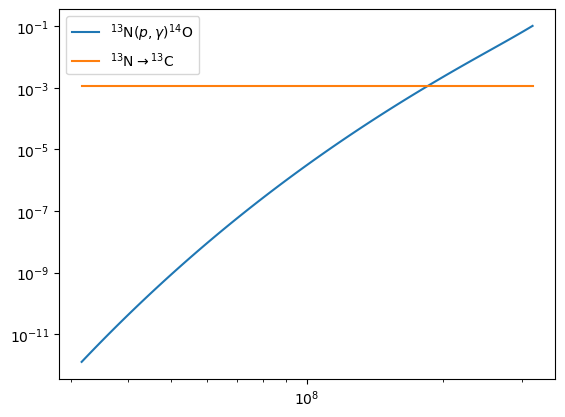

In [12]:
fig, ax = plt.subplots()
ax.plot(T, rate_p_capture, label=r"${}^{13}\mathrm{N}(p,\gamma){}^{14}\mathrm{O}$")
ax.plot(T, rate_beta_decay, label=r"${}^{13}\mathrm{N} \rightarrow {}^{13}\mathrm{C}$")
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")